# EDA Lab

## Supervised Learning - Logistic Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="white", color_codes=True)

iris = pd.read_csv("./datasets/Iris.csv") # the iris dataset is now a Pandas DataFrame


In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# how many examples in each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

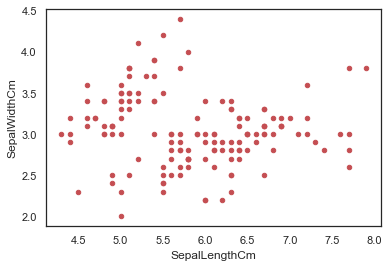

In [5]:
#Observe scatterplot of the Iris features
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color='r')

### A seaborn jointplot - bivariate scatterplots and univariate histograms 

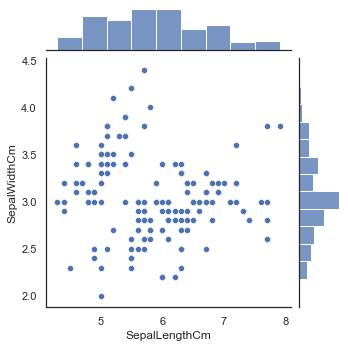

In [6]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5)

### Seaborn's FacetGrid - to color the scatterplot by species

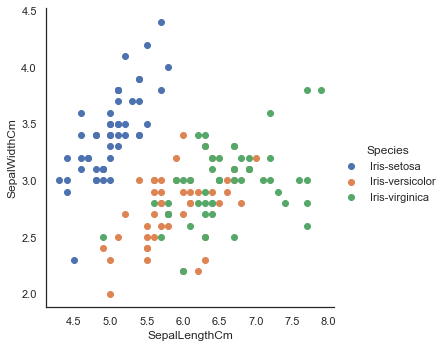

In [7]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

### Boxplot

- **Boxplots** are a great tool for data visualisation.
- Boxplots can be used to:
    - To understand the distribution (spread/range) of the data
    - To determine if data is skewed or not
    - Identify outliers or anomalous data points


<img src="images/boxplot.png"> </img>

#### Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Simple box plot using Pandas

<AxesSubplot:>

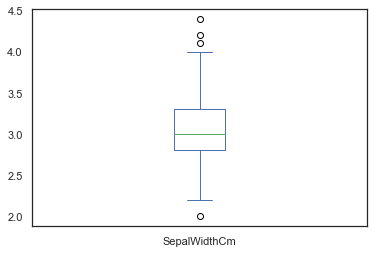

In [9]:
iris['SepalWidthCm'].plot(kind='box')

#### Boxplots with Logarithmic Axes

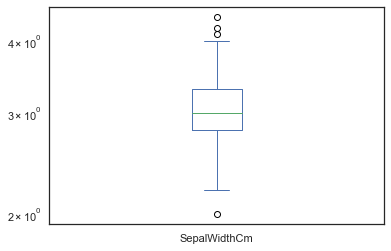

In [10]:
#Viewing logarithmically scaled data

iris['SepalWidthCm'].plot(kind='box')
plt.semilogy();

#### Making Boxplots Horizontal

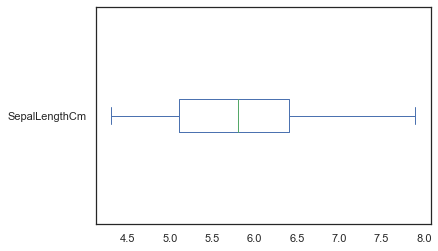

In [11]:
#Rotating the box plot so it is horizontal
iris['SepalLengthCm'].plot(kind='box', vert=False);

#### Displaying all columns

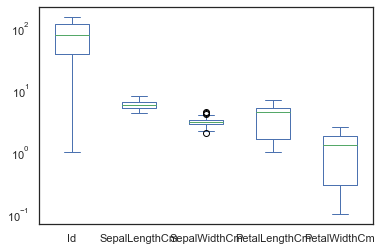

In [12]:
#Displaying all columns in the dataframe on a single figure
iris.plot(kind='box');
plt.semilogy();

### Seaborn Boxplot

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

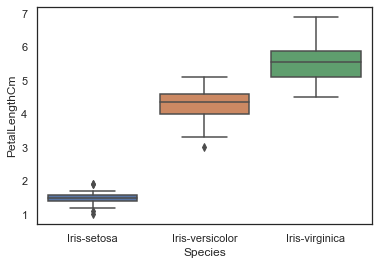

In [13]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

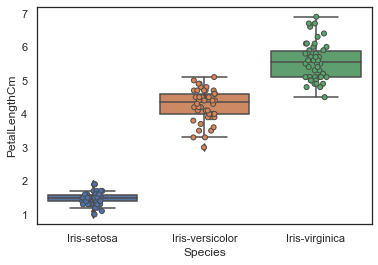

In [14]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, linewidth=1)

### Seaborn Violin plot

 - A violin plot combines the benefits of the previous two plots and simplifies them
 - Denser regions of the data are fatter, and sparser thiner in a violin plot

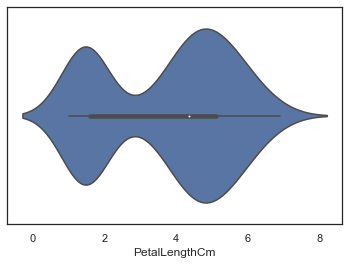

In [15]:
ax = sns.violinplot(x="PetalLengthCm", data=iris)

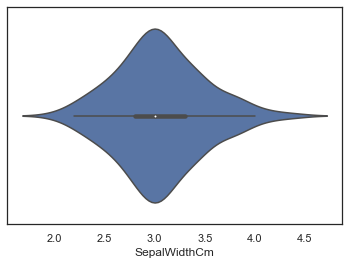

In [16]:
ax = sns.violinplot(x="SepalWidthCm", data=iris)

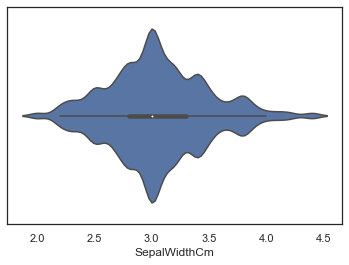

In [17]:
### Tune bandwidth
ax = sns.violinplot(x="SepalWidthCm", data=iris, bw=.15)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

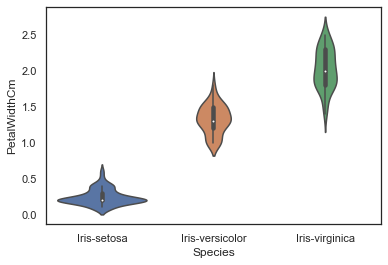

In [18]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalWidthCm", data=iris)

### kdeplot

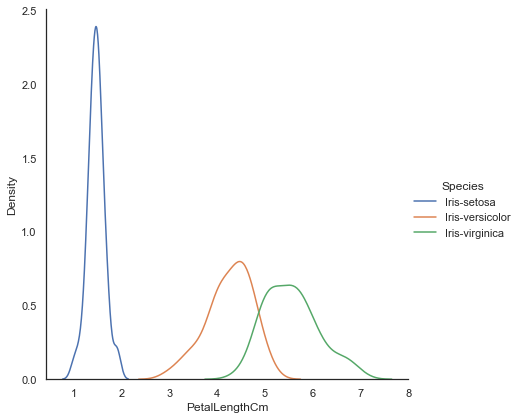

In [19]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

### Pairplot

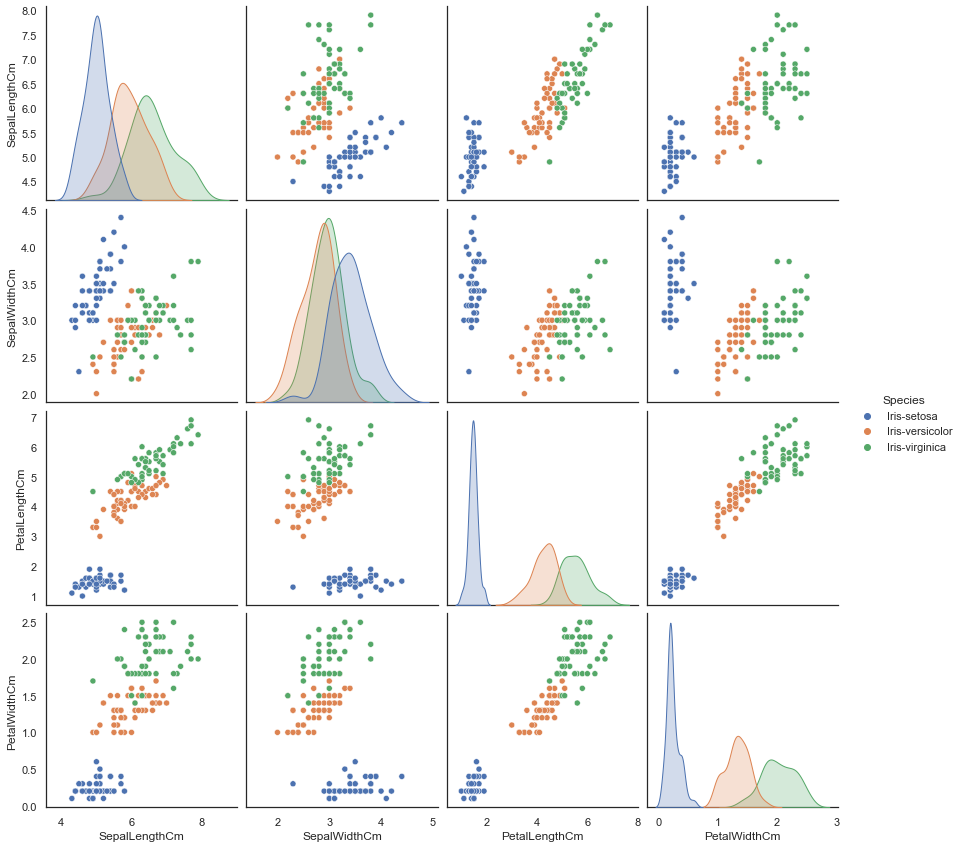

In [20]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3)

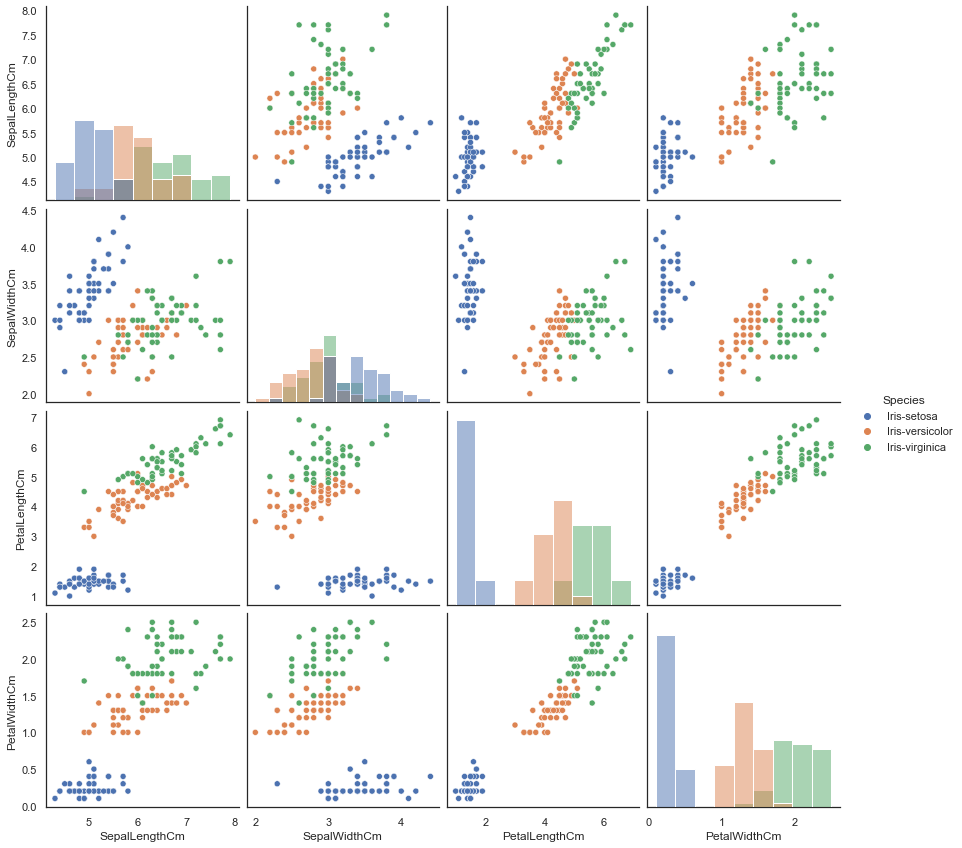

In [21]:
# The diagonal elements in a pairplot show the kde by default
# We can update these elements to show other things, such as a histogram
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3, diag_kind="hist")

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

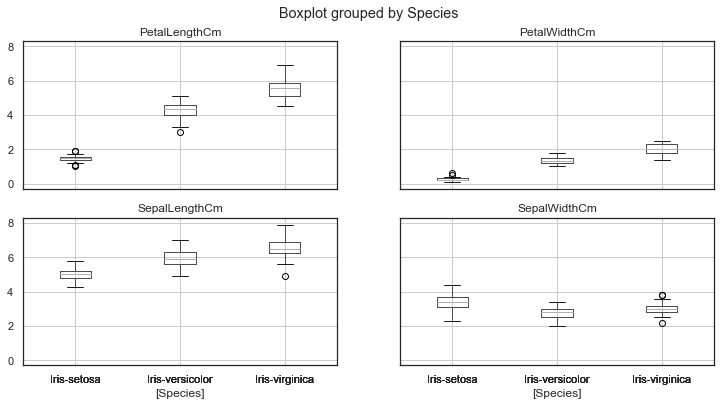

In [22]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

## Start here for building logistic regression model

In [23]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris.set_index('Id', inplace=True)

In [25]:
## REVIST this CELL

# co relation between attributes
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Taking the first two features - X

In [26]:
import numpy as np
X = iris[["PetalLengthCm","PetalWidthCm"]]
#X=np.array(X).reshape(-1,1)


#### Lable Encoding for Species attribute - y

In [27]:
from sklearn.preprocessing import LabelEncoder
labels = iris['Species']

# Label encoding for the categorical data 
le = LabelEncoder()
y = le.fit_transform(labels)

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

 - `sklearn.model_selection`  - train test split of data; 
 - `sklearn.linear_model` - logestic regression model for target prediction
 - `sklearn.metrics` - model evaluation, performace measure

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    

In [32]:
## code here
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

#### Predicting the test set results 

In [33]:
print(y_test)
y_pred=lgr.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


#### Confusion Matrix with an example
- **TN:** A person who is actually not pregnant (negative) and classified as not pregnant (negative).
- **TP:** A person who is actually pregnant (positive) and classified as pregnant (positive).
- **FP:** A person who is actually not pregnant (negative) and classified as pregnant (positive)
- **FN:** A person who is actually pregnant (positive) and classified as not pregnant (negative).
- Consider in **100** people **40** are pregnant and the remaining **60** people are not but have fat belly.
- Out of **40** pregnant women **30** pregnant women are classified correctly and the remaining **10** pregnant women are classified as not pregnant.
- Out of **60** people in the not pregnant category, **55** are classified as not pregnant and the remaining **5** are classified as pregnant.

<img src = './images/confusion_matrix.png'></img>

*  **[Q]** What is the **accuracy** of the machine learning model for this classification task?
* **[A] Accuracy** = $\frac{(TP + TN)} {(TP + TN + FP + FN)} = 0.85$

* **[Q]** Is accuracy the best measure?
* **[A]** Accuracy is not good measure if the data is not balanced (**Data Imbalancing**).

#### Data Imbalancing Problem
- Consider **90** people who are healthy (negative) and **10** people who have some disease (positive).
- Learning model perfectly classifies the **90** people as healthy but it also classifies the unhealthy people as healthy. (i.e., TN = 90, FP = 0, FN = 10 and TP = 0)


* **[Q]** What is the accuracy of the machine learning model for this classification task?
* **[A] Accuracy** = $\frac{(TP + TN)} {(TP + TN + FP + FN)} = 0.9$

* **[Q]** Is there anything fishy?
* **[A]** Accuracy is **90%** but this model is very poor because all the **10** people who are unhealthy are classified as healthy.
* **Inference:** Thus accuracy is not a good metric when the data set is unbalanced.
* There are another set of good metric which are derived from the confusion matrix.

<img src = './images/confusion_matrix1.png'></img>

* **Precision** should ideally be 1 (high) for a good classifier. (In our example Precision = 0.857)
* **Recall** should ideally be 1 (high) for a good classifier. (In our example Recall = 0.75)
* Thus, **F1 score** is the harmonic mean of precision and recall and is a better measure than accuracy. ( In our example F1 = 0.799)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix =confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


The result is telling us that we have 16+13+8 correct predictions and 0+13+0 incorrect predictions.

#### Caculating the accuracy

In [36]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Interpretation:
???